#Chicago No-Heat Problem Project



###Import Additional Libraries for Spatial Join

In [1]:
!pip install mapclassify

In [2]:
!pip3 install keplergl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 22.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922315 sha256=7e3a7f60d63113932d95cd842baa4c8e812e14296bad2f4c3713a13918bead45
  Stored in directory: /root/.cache/pip/wheels/e5/e9/db/b8b8f2fcb5cb1cd7268d88959fce267bc00697cb8f50dcd0d9
Successfully built keplergl


###Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import geopandas as gpd
from keplergl import KeplerGl

### Project Prompt and Data Import
### More Chicagoans lacked heat in January than any month since 2019 amid historic cold

1. Go to the Chicago Data Portal: https://data.cityofchicago.org/
2. Find each dataset. Building violations, ward, and police.
3. Add a data notes section to your github readme. This should include information about the source of your data, where it came from, how often it is updated, and the period of data it contains (e.g. 2010-present or 2012 to 2019)
4. Lastly, test that this import works. This may take a while as the dataset is large.

In [4]:
build = pd.read_csv('https://data.cityofchicago.org/resource/22u3-xenr.csv?$limit=3000000')

In [5]:
#you can use any of these
ward = gpd.read_file('https://data.cityofchicago.org/api/geospatial/sp34-6z76?method=export&format=GeoJSON')
police = gpd.read_file('https://data.cityofchicago.org/api/geospatial/fthy-xz3r?method=export&format=GeoJSON')

###Testing That the Imports of build, ward, and Police Dataset Worked

In [6]:
#Testing that this import of the 'build' dataset works using .head()
build.head()

id violation_last_modified_date           violation_date  \
0  7153684      2024-04-23T15:48:17.000  2024-04-23T00:00:00.000   
1  7153681      2024-04-23T15:48:17.000  2024-04-23T00:00:00.000   
2  7153105      2024-04-23T07:00:21.000  2024-04-23T00:00:00.000   
3  7153589      2024-04-23T14:54:55.000  2024-04-23T00:00:00.000   
4  7153593      2024-04-23T15:01:30.000  2024-04-23T00:00:00.000   

  violation_code violation_status violation_status_date  \
0       CN104015             OPEN                   NaN   
1       CN070024             OPEN                   NaN   
2       CN197079             OPEN                   NaN   
3         EV1400             OPEN                   NaN   
4         EV1400             OPEN                   NaN   

            violation_description   violation_location  \
0   REPLCE WINDOW PANES, PLEXGLAS       INTERIOR:001 :   
1             REPAIR PORCH SYSTEM       INTERIOR:003 :   
2  REPAIR/REPLACE SMOKE DETECTORS  OTHER   :    :OTHER   
3      OBTAIN PERMIT FOR PERS/HST                  NaN   
4      OBTAIN PERMIT FOR PERS/HST                  NaN   

                        violation_inspector_comments  \
0  EAST ELEVATION / 1ST FLOOR / WINDOW - LOWER SE...   
1  REAR ENCLOSED PORCH SYSTEM / GRADE TO 3RD FLOO...   
2                    MISSING PROPER SMOKE DETECTORS.   
3  BOTH: MAKE NECESSARY REPAIRS TO HOIST FOR PROP...   
4                 BOTH: PROVIDE EMERGENCY PHONE LINE   

                                 violation_ordinance  ...  \
0  Replace broken, missing or defective window pa...  ...   
1  Failed to repair or replace defective or missi...  ...   
2  Repair or replace defective or out of service ...  ...   
3  Failed to obtain permit for construction, inst...  ...   
4  Failed to obtain permit for construction, inst...  ...   

                address  street_number street_direction street_name  \
0        4015 W 21ST ST           4015                W        21ST   
1        4015 W 21ST ST           4015                W        21ST   
2       3510 W 111TH ST           3510                W       111TH   
3  12440 S TORRENCE AVE          12440                S    TORRENCE   
4  12440 S TORRENCE AVE          12440                S    TORRENCE   

  street_type property_group   ssa   latitude  longitude  \
0          ST         275187   NaN  41.853377 -87.725453   
1          ST         275187   NaN  41.853377 -87.725453   
2          ST         518711  55.0  41.691554 -87.708639   
3         AVE         538601   NaN  41.669214 -87.559402   
4         AVE         538601   NaN  41.669214 -87.559402   

                                          location  
0   \n,  \n(41.85337747246141, -87.72545318243932)  
1   \n,  \n(41.85337747246141, -87.72545318243932)  
2  \n,  \n(41.691553840515276, -87.70863882538332)  
3   \n,  \n(41.66921371124866, -87.55940224560366)  
4   \n,  \n(41.66921371124866, -87.55940224560366)  

[5 rows x 26 columns]

In [7]:
#Testing that this import of the 'build' dataset works using .tail()
build.tail()

id violation_last_modified_date           violation_date  \
1907864  1504828      2009-03-04T12:17:27.000  2006-01-01T00:00:00.000   
1907865  1504826      2009-03-04T12:17:10.000  2006-01-01T00:00:00.000   
1907866  1433809      2007-09-07T07:35:40.000  2006-01-01T00:00:00.000   
1907867  1345880      2006-04-11T08:18:49.000  2006-01-01T00:00:00.000   
1907868  1430856      2008-10-14T14:28:57.000  2006-01-01T00:00:00.000   

        violation_code violation_status    violation_status_date  \
1907864       CN197019         COMPLIED  2009-01-28T00:00:00.000   
1907865       CN061014         COMPLIED  2009-01-28T00:00:00.000   
1907866       CN061024         COMPLIED  2007-08-20T00:00:00.000   
1907867       CN194039             OPEN                      NaN   
1907868         NC5042         COMPLIED  2008-07-10T00:00:00.000   

                violation_description violation_location  \
1907864       INSTALL SMOKE DETECTORS                NaN   
1907865          REPAIR EXTERIOR WALL                NaN   
1907866  SUBMIT 2 COPY STRUCTURAL RPT                NaN   
1907867                        REMOVE                NaN   
1907868  SELF-CLOSE CLASS B FIRE DOOR                NaN   

                              violation_inspector_comments  \
1907864        NO SMOKE DETECTOR AT TOP OF FRONT STAIRWELL   
1907865  7154 FRACTURES IN BRICKS AND MISSING MORTAR WE...   
1907866                     PORCHES SUBMIT ENGINEER REPORT   
1907867  ONE 175 TON COOLING TOWER AND RELATED PIPING F...   
1907868                       VARIOUS DOORS BROKEN CLOSERS   

                                       violation_ordinance  ...  \
1907864  Install and maintain approved smoke detectors....  ...   
1907865  Failed to maintain the exterior walls of a bui...  ...   
1907866  Failed to maintain building or structure in a ...  ...   
1907867                                             Remove  ...   
1907868  Failed to provide 1-1/2 hour Class B fire door...  ...   

                    address  street_number street_direction street_name  \
1907864  7152 S EMERALD AVE           7152                S     EMERALD   
1907865  7152 S EMERALD AVE           7152                S     EMERALD   
1907866  8056 S ASHLAND AVE           8056                S     ASHLAND   
1907867    2203 W DEVON AVE           2203                W       DEVON   
1907868     6501 S LOWE AVE           6501                S        LOWE   

        street_type property_group   ssa   latitude  longitude  \
1907864         AVE          20462   NaN  41.763664 -87.643137   
1907865         AVE          20462   NaN  41.763664 -87.643137   
1907866         AVE          21192  69.0  41.746860 -87.663494   
1907867         AVE         565750  43.0  41.997701 -87.685147   
1907868         AVE          19693   NaN  41.776074 -87.640625   

                                               location  
1907864  \n,  \n(41.76366389786062, -87.64313670468162)  
1907865  \n,  \n(41.76366389786062, -87.64313670468162)  
1907866  \n,  \n(41.74685999564833, -87.66349448960126)  
1907867   \n,  \n(41.99770079922752, -87.6851465642111)  
1907868   \n,  \n(41.7760739361563, -87.64062455203374)  

[5 rows x 26 columns]

In [8]:
#Testing that this import of the 'build' dataset works using .columns
build.columns

Index(['id', 'violation_last_modified_date', 'violation_date',
       'violation_code', 'violation_status', 'violation_status_date',
       'violation_description', 'violation_location',
       'violation_inspector_comments', 'violation_ordinance', 'inspector_id',
       'inspection_number', 'inspection_status', 'inspection_waived',
       'inspection_category', 'department_bureau', 'address', 'street_number',
       'street_direction', 'street_name', 'street_type', 'property_group',
       'ssa', 'latitude', 'longitude', 'location'],
      dtype='object')

In [9]:
#Testing that this import of the 'build' dataset works using .shape
build.shape

(1907869, 26)

In [10]:
#Testing that this import of the 'build' dataset works using .info()
build.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907869 entries, 0 to 1907868
Data columns (total 26 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id                            int64  
 1   violation_last_modified_date  object 
 2   violation_date                object 
 3   violation_code                object 
 4   violation_status              object 
 5   violation_status_date         object 
 6   violation_description         object 
 7   violation_location            object 
 8   violation_inspector_comments  object 
 9   violation_ordinance           object 
 10  inspector_id                  object 
 11  inspection_number             int64  
 12  inspection_status             object 
 13  inspection_waived             object 
 14  inspection_category           object 
 15  department_bureau             object 
 16  address                       object 
 17  street_number                 int64  
 18  street_direction      

In [11]:
#Testing that this import of the 'ward' dataset works using .head()
ward.head()

shape_area     shape_leng ward  \
0  116096507.849  93073.3408379   12   
1  103143638.546  97901.3238332   16   
2   65588297.917  82183.6948197   15   
3   137290356.97  90105.1956185   20   
4  49733459.1385  38122.6928259   49   

                                            geometry  
0  MULTIPOLYGON (((-87.69623 41.85755, -87.69625 ...  
1  MULTIPOLYGON (((-87.66289 41.79884, -87.66289 ...  
2  MULTIPOLYGON (((-87.69818 41.81729, -87.69817 ...  
3  MULTIPOLYGON (((-87.65524 41.80883, -87.65524 ...  
4  MULTIPOLYGON (((-87.66420 42.02126, -87.66419 ...

In [12]:
#Testing that this import of the 'ward' dataset works using .info()
ward.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   shape_area  50 non-null     object  
 1   shape_leng  50 non-null     object  
 2   ward        50 non-null     object  
 3   geometry    50 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 1.7+ KB


In [13]:
#Testing that this import of the 'police' dataset works using .head()
police.head()

dist_label dist_num                                           geometry
0       17TH       17  MULTIPOLYGON (((-87.71067 41.99737, -87.71067 ...
1       20TH       20  MULTIPOLYGON (((-87.66029 41.99092, -87.66029 ...
2       31ST       31  MULTIPOLYGON (((-87.82818 41.98384, -87.82816 ...
3       31ST       31  MULTIPOLYGON (((-87.83365 41.97535, -87.83366 ...
4       19TH       19  MULTIPOLYGON (((-87.64492 41.96973, -87.64431 ...

In [14]:
#Testing that this import of the 'police' dataset works using .info()
police.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dist_label  25 non-null     object  
 1   dist_num    25 non-null     object  
 2   geometry    25 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 728.0+ bytes


### Converting Data Type(s)

In [15]:
#Converting 'violation_date' to datetime
build['violation_date'] = pd.to_datetime(build['violation_date'])

In [16]:
#Adding 'month' colum and converting to .dt.month
build['month'] = build['violation_date'].dt.month

In [17]:
#Adding 'year' colum and converting to .dt.year datetime
build['year'] = build['violation_date'].dt.year

In [18]:
#Checking to see if the two columns were created by using .head()
build.head()

id violation_last_modified_date violation_date violation_code  \
0  7153684      2024-04-23T15:48:17.000     2024-04-23       CN104015   
1  7153681      2024-04-23T15:48:17.000     2024-04-23       CN070024   
2  7153105      2024-04-23T07:00:21.000     2024-04-23       CN197079   
3  7153589      2024-04-23T14:54:55.000     2024-04-23         EV1400   
4  7153593      2024-04-23T15:01:30.000     2024-04-23         EV1400   

  violation_status violation_status_date           violation_description  \
0             OPEN                   NaN   REPLCE WINDOW PANES, PLEXGLAS   
1             OPEN                   NaN             REPAIR PORCH SYSTEM   
2             OPEN                   NaN  REPAIR/REPLACE SMOKE DETECTORS   
3             OPEN                   NaN      OBTAIN PERMIT FOR PERS/HST   
4             OPEN                   NaN      OBTAIN PERMIT FOR PERS/HST   

    violation_location                       violation_inspector_comments  \
0       INTERIOR:001 :  EAST ELEVATION / 1ST FLOOR / WINDOW - LOWER SE...   
1       INTERIOR:003 :  REAR ENCLOSED PORCH SYSTEM / GRADE TO 3RD FLOO...   
2  OTHER   :    :OTHER                    MISSING PROPER SMOKE DETECTORS.   
3                  NaN  BOTH: MAKE NECESSARY REPAIRS TO HOIST FOR PROP...   
4                  NaN                 BOTH: PROVIDE EMERGENCY PHONE LINE   

                                 violation_ordinance  ... street_direction  \
0  Replace broken, missing or defective window pa...  ...                W   
1  Failed to repair or replace defective or missi...  ...                W   
2  Repair or replace defective or out of service ...  ...                W   
3  Failed to obtain permit for construction, inst...  ...                S   
4  Failed to obtain permit for construction, inst...  ...                S   

   street_name street_type property_group   ssa   latitude  longitude  \
0         21ST          ST         275187   NaN  41.853377 -87.725453   
1         21ST          ST         275187   NaN  41.853377 -87.725453   
2        111TH          ST         518711  55.0  41.691554 -87.708639   
3     TORRENCE         AVE         538601   NaN  41.669214 -87.559402   
4     TORRENCE         AVE         538601   NaN  41.669214 -87.559402   

                                          location month  year  
0   \n,  \n(41.85337747246141, -87.72545318243932)     4  2024  
1   \n,  \n(41.85337747246141, -87.72545318243932)     4  2024  
2  \n,  \n(41.691553840515276, -87.70863882538332)     4  2024  
3   \n,  \n(41.66921371124866, -87.55940224560366)     4  2024  
4   \n,  \n(41.66921371124866, -87.55940224560366)     4  2024  

[5 rows x 28 columns]

In [19]:
#Checking to make sure converting data types from above worked by using .info()
build.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907869 entries, 0 to 1907868
Data columns (total 28 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   id                            int64         
 1   violation_last_modified_date  object        
 2   violation_date                datetime64[ns]
 3   violation_code                object        
 4   violation_status              object        
 5   violation_status_date         object        
 6   violation_description         object        
 7   violation_location            object        
 8   violation_inspector_comments  object        
 9   violation_ordinance           object        
 10  inspector_id                  object        
 11  inspection_number             int64         
 12  inspection_status             object        
 13  inspection_waived             object        
 14  inspection_category           object        
 15  department_bureau             ob

### Filtering For Heat Violations

In [20]:
#Adding a column to identify heat violations with .np.where
build['is_heat'] = np.where(build['violation_description'] == 'HEAT UNIT ADEQUATELY', 'heat_violation', 'not_heat_violation')

In [21]:
#Checking to see that the new column got added by using .columns
build.columns

Index(['id', 'violation_last_modified_date', 'violation_date',
       'violation_code', 'violation_status', 'violation_status_date',
       'violation_description', 'violation_location',
       'violation_inspector_comments', 'violation_ordinance', 'inspector_id',
       'inspection_number', 'inspection_status', 'inspection_waived',
       'inspection_category', 'department_bureau', 'address', 'street_number',
       'street_direction', 'street_name', 'street_type', 'property_group',
       'ssa', 'latitude', 'longitude', 'location', 'month', 'year', 'is_heat'],
      dtype='object')

In [22]:
#Checking the data frame to see the new column included by using .head()
build.head()

id violation_last_modified_date violation_date violation_code  \
0  7153684      2024-04-23T15:48:17.000     2024-04-23       CN104015   
1  7153681      2024-04-23T15:48:17.000     2024-04-23       CN070024   
2  7153105      2024-04-23T07:00:21.000     2024-04-23       CN197079   
3  7153589      2024-04-23T14:54:55.000     2024-04-23         EV1400   
4  7153593      2024-04-23T15:01:30.000     2024-04-23         EV1400   

  violation_status violation_status_date           violation_description  \
0             OPEN                   NaN   REPLCE WINDOW PANES, PLEXGLAS   
1             OPEN                   NaN             REPAIR PORCH SYSTEM   
2             OPEN                   NaN  REPAIR/REPLACE SMOKE DETECTORS   
3             OPEN                   NaN      OBTAIN PERMIT FOR PERS/HST   
4             OPEN                   NaN      OBTAIN PERMIT FOR PERS/HST   

    violation_location                       violation_inspector_comments  \
0       INTERIOR:001 :  EAST ELEVATION / 1ST FLOOR / WINDOW - LOWER SE...   
1       INTERIOR:003 :  REAR ENCLOSED PORCH SYSTEM / GRADE TO 3RD FLOO...   
2  OTHER   :    :OTHER                    MISSING PROPER SMOKE DETECTORS.   
3                  NaN  BOTH: MAKE NECESSARY REPAIRS TO HOIST FOR PROP...   
4                  NaN                 BOTH: PROVIDE EMERGENCY PHONE LINE   

                                 violation_ordinance  ... street_name  \
0  Replace broken, missing or defective window pa...  ...        21ST   
1  Failed to repair or replace defective or missi...  ...        21ST   
2  Repair or replace defective or out of service ...  ...       111TH   
3  Failed to obtain permit for construction, inst...  ...    TORRENCE   
4  Failed to obtain permit for construction, inst...  ...    TORRENCE   

   street_type property_group   ssa   latitude  longitude  \
0           ST         275187   NaN  41.853377 -87.725453   
1           ST         275187   NaN  41.853377 -87.725453   
2           ST         518711  55.0  41.691554 -87.708639   
3          AVE         538601   NaN  41.669214 -87.559402   
4          AVE         538601   NaN  41.669214 -87.559402   

                                          location  month  year  \
0   \n,  \n(41.85337747246141, -87.72545318243932)      4  2024   
1   \n,  \n(41.85337747246141, -87.72545318243932)      4  2024   
2  \n,  \n(41.691553840515276, -87.70863882538332)      4  2024   
3   \n,  \n(41.66921371124866, -87.55940224560366)      4  2024   
4   \n,  \n(41.66921371124866, -87.55940224560366)      4  2024   

              is_heat  
0  not_heat_violation  
1  not_heat_violation  
2  not_heat_violation  
3  not_heat_violation  
4  not_heat_violation  

[5 rows x 29 columns]

In [23]:
#Using .value_counts() to find the amount of heat violations to date
build['is_heat'].value_counts()

is_heat
not_heat_violation    1895199
heat_violation          12670
Name: count, dtype: int64

In [24]:
#From the code right above, since Jan 2019, there were 12,668 heat violations

###Combining 'month' and 'year' Into a New Column

In [25]:
#Combining month and year for future use for our first graph
build['month_year'] = build['month'].astype(str) + '-' + build['year'].astype(str)

In [26]:
#Checking to see if the column got added via .columns()
build.columns

Index(['id', 'violation_last_modified_date', 'violation_date',
       'violation_code', 'violation_status', 'violation_status_date',
       'violation_description', 'violation_location',
       'violation_inspector_comments', 'violation_ordinance', 'inspector_id',
       'inspection_number', 'inspection_status', 'inspection_waived',
       'inspection_category', 'department_bureau', 'address', 'street_number',
       'street_direction', 'street_name', 'street_type', 'property_group',
       'ssa', 'latitude', 'longitude', 'location', 'month', 'year', 'is_heat',
       'month_year'],
      dtype='object')

In [27]:
#Checking to see if the column got added via .head()
build.head()

id violation_last_modified_date violation_date violation_code  \
0  7153684      2024-04-23T15:48:17.000     2024-04-23       CN104015   
1  7153681      2024-04-23T15:48:17.000     2024-04-23       CN070024   
2  7153105      2024-04-23T07:00:21.000     2024-04-23       CN197079   
3  7153589      2024-04-23T14:54:55.000     2024-04-23         EV1400   
4  7153593      2024-04-23T15:01:30.000     2024-04-23         EV1400   

  violation_status violation_status_date           violation_description  \
0             OPEN                   NaN   REPLCE WINDOW PANES, PLEXGLAS   
1             OPEN                   NaN             REPAIR PORCH SYSTEM   
2             OPEN                   NaN  REPAIR/REPLACE SMOKE DETECTORS   
3             OPEN                   NaN      OBTAIN PERMIT FOR PERS/HST   
4             OPEN                   NaN      OBTAIN PERMIT FOR PERS/HST   

    violation_location                       violation_inspector_comments  \
0       INTERIOR:001 :  EAST ELEVATION / 1ST FLOOR / WINDOW - LOWER SE...   
1       INTERIOR:003 :  REAR ENCLOSED PORCH SYSTEM / GRADE TO 3RD FLOO...   
2  OTHER   :    :OTHER                    MISSING PROPER SMOKE DETECTORS.   
3                  NaN  BOTH: MAKE NECESSARY REPAIRS TO HOIST FOR PROP...   
4                  NaN                 BOTH: PROVIDE EMERGENCY PHONE LINE   

                                 violation_ordinance  ... street_type  \
0  Replace broken, missing or defective window pa...  ...          ST   
1  Failed to repair or replace defective or missi...  ...          ST   
2  Repair or replace defective or out of service ...  ...          ST   
3  Failed to obtain permit for construction, inst...  ...         AVE   
4  Failed to obtain permit for construction, inst...  ...         AVE   

   property_group   ssa   latitude  longitude  \
0          275187   NaN  41.853377 -87.725453   
1          275187   NaN  41.853377 -87.725453   
2          518711  55.0  41.691554 -87.708639   
3          538601   NaN  41.669214 -87.559402   
4          538601   NaN  41.669214 -87.559402   

                                          location month  year  \
0   \n,  \n(41.85337747246141, -87.72545318243932)     4  2024   
1   \n,  \n(41.85337747246141, -87.72545318243932)     4  2024   
2  \n,  \n(41.691553840515276, -87.70863882538332)     4  2024   
3   \n,  \n(41.66921371124866, -87.55940224560366)     4  2024   
4   \n,  \n(41.66921371124866, -87.55940224560366)     4  2024   

              is_heat month_year  
0  not_heat_violation     4-2024  
1  not_heat_violation     4-2024  
2  not_heat_violation     4-2024  
3  not_heat_violation     4-2024  
4  not_heat_violation     4-2024  

[5 rows x 30 columns]

###Beginning Useful Code for Graph 1

- Using filtering to create new df called 'graph_no_heat'
- The filtered dataset will be useful information for eventually downloading and using for data in our first graph

In [28]:
#Creating new df called 'graph_no_heat' that only includes instances whose 'violation_code' is equal to 'CN132016' via using simpled filtering
graph_no_heat = build[build['violation_code'] == 'CN132016']

In [29]:
#Checking to see the new df out via .head()
graph_no_heat.head()

id violation_last_modified_date violation_date violation_code  \
126   7152814      2024-04-22T11:24:24.000     2024-04-22       CN132016   
773   7148900      2024-04-15T09:05:32.000     2024-04-15       CN132016   
1521  7146237      2024-04-08T13:05:35.000     2024-04-08       CN132016   
1525  7145591      2024-04-08T14:44:35.000     2024-04-08       CN132016   
1836  7144175      2024-04-04T13:01:43.000     2024-04-04       CN132016   

     violation_status violation_status_date violation_description  \
126              OPEN                   NaN  HEAT UNIT ADEQUATELY   
773              OPEN                   NaN  HEAT UNIT ADEQUATELY   
1521             OPEN                   NaN  HEAT UNIT ADEQUATELY   
1525             OPEN                   NaN  HEAT UNIT ADEQUATELY   
1836             OPEN                   NaN  HEAT UNIT ADEQUATELY   

                                     violation_location  \
126   INTERIOR:001 :ENTIRE SINGLE FAMILY HOME AND BA...   
773                                      INTERIOR:002 :   
1521                                OTHER   :    :OTHER   
1525                                     INTERIOR:002 :   
1836                                OTHER   :    :OTHER   

                           violation_inspector_comments  \
126   2316 W / ALL ROOMS - 57F AT 11:10AM, BASEMENT ...   
773   1263 S CENTRAL PARK APT 2 / ALL ROOMS 72F DEGR...   
1521  CB132016 - 2ND FLOOR BEDROOMS TEMP WAS 66F AT ...   
1525  2207 S / APT.2 / ALL ROOMS - 64F DEGREES; AT (...   
1836  UNIT 104 / ROOM TEMPERATURES : BEDROOM AT FRON...   

                                    violation_ordinance  ... street_type  \
126   Heat dwelling unit adequately from September 1...  ...          ST   
773   Heat dwelling unit adequately from September 1...  ...         AVE   
1521  Heat dwelling unit adequately from September 1...  ...        BLVD   
1525  Heat dwelling unit adequately from September 1...  ...         AVE   
1836  Heat dwelling unit adequately from September 1...  ...         AVE   

      property_group ssa   latitude  longitude  \
126           255742 NaN  41.871463 -87.684518   
773            15707 NaN  41.864450 -87.715218   
1521          397833 NaN  41.770705 -87.658975   
1525           26373 NaN  41.851364 -87.718497   
1836           19107 NaN  41.790078 -87.590369   

                                             location month  year  \
126    \n,  \n(41.87146304476723, -87.68451837447857)     4  2024   
773   \n,  \n(41.864450173563014, -87.71521848941047)     4  2024   
1521   \n,  \n(41.77070465111202, -87.65897462365271)     4  2024   
1525   \n,  \n(41.85136381385009, -87.71849743242603)     4  2024   
1836   \n,  \n(41.79007818420464, -87.59036862158871)     4  2024   

             is_heat month_year  
126   heat_violation     4-2024  
773   heat_violation     4-2024  
1521  heat_violation     4-2024  
1525  heat_violation     4-2024  
1836  heat_violation     4-2024  

[5 rows x 30 columns]

In [30]:
#Checking to how many heat violations there were by using .shape
graph_no_heat.shape

(12670, 30)

In [31]:
#Doing another filter this time using df 'graph_no_heat' to make sure it only includes instances whose year is either in 2019 or greater
#Also making it persist by updating the 'graph_no_heat' dataframe to include this filter
graph_no_heat = graph_no_heat[graph_no_heat['year'] >= 2019]

In [32]:
#Sorting values in 'graph_no_heat' by ascending 'month' and 'year'
#Using this sorting method and .head() to check and see if code worked and got us only instances in or after 2019, which it did
graph_no_heat.sort_values(by=['month','year'], ascending=[True,True]).head()

id violation_last_modified_date violation_date violation_code  \
299353  6185533      2020-01-10T13:25:50.000     2019-01-31       CN132016   
299354  6185701      2020-01-14T13:44:32.000     2019-01-31       CN132016   
299365  6184559      2019-01-31T11:13:09.000     2019-01-31       CN132016   
299372  6185689      2019-05-28T09:45:48.000     2019-01-31       CN132016   
299376  6185693      2019-05-28T09:46:51.000     2019-01-31       CN132016   

       violation_status    violation_status_date violation_description  \
299353         COMPLIED  2019-11-14T00:00:00.000  HEAT UNIT ADEQUATELY   
299354             OPEN                      NaN  HEAT UNIT ADEQUATELY   
299365             OPEN                      NaN  HEAT UNIT ADEQUATELY   
299372         COMPLIED  2019-05-21T00:00:00.000  HEAT UNIT ADEQUATELY   
299376         COMPLIED  2019-05-28T00:00:00.000  HEAT UNIT ADEQUATELY   

                 violation_location  \
299353          OTHER   :    :OTHER   
299354          OTHER   :    :OTHER   
299365          OTHER   :    :OTHER   
299372  OTHER   :    :OTHER BL00876   
299376          OTHER   :    :OTHER   

                             violation_inspector_comments  \
299353  67 / APT. - 1E / ROOM TEMPERATURES : BEDROOM 5...   
299354  UNIT 1529-2CD ... IT WAS 51 DEGREES ON 1/31/20...   
299365  UNTI 612 ... 59 DEGREES. UNIT 907 ... 55 DEGRE...   
299372   UNIT 2-H WAS 55 DEGREES AT 6:48 PM ON 1/31/2019.   
299376   UNIT 2-H WAS 55 DEGREES AT 6:48 PM ON 1/31/2019.   

                                      violation_ordinance  ... street_type  \
299353  Heat dwelling unit adequately from September 1...  ...          ST   
299354  Heat dwelling unit adequately from September 1...  ...        BLVD   
299365  Heat dwelling unit adequately from September 1...  ...          RD   
299372  Heat dwelling unit adequately from September 1...  ...          RD   
299376  Heat dwelling unit adequately from September 1...  ...          RD   

        property_group   ssa   latitude  longitude  \
299353           18989   NaN  41.790957 -87.622906   
299354           13366   NaN  42.005293 -87.668924   
299365          669329  18.0  41.952870 -87.649340   
299372          244065   NaN  42.019899 -87.666083   
299376          244065   NaN  42.019899 -87.666083   

                                               location month  year  \
299353  \n,  \n(41.790956722287824, -87.62290640862267)     1  2019   
299354  \n,  \n(42.005292705104516, -87.66892358419032)     1  2019   
299365   \n,  \n(41.95286968761728, -87.64934017938488)     1  2019   
299372   \n,  \n(42.01989861906472, -87.66608326696745)     1  2019   
299376   \n,  \n(42.01989861906472, -87.66608326696745)     1  2019   

               is_heat month_year  
299353  heat_violation     1-2019  
299354  heat_violation     1-2019  
299365  heat_violation     1-2019  
299372  heat_violation     1-2019  
299376  heat_violation     1-2019  

[5 rows x 30 columns]

In [33]:
#Using this sorting method and .tail() to check and see if code worked and got us only instances in or after 2019, which it did
graph_no_heat.sort_values(by=['month','year'], ascending=[True,True]).tail()

id violation_last_modified_date violation_date violation_code  \
16976  7081456      2023-12-01T14:18:35.000     2023-12-01       CN132016   
16979  7082130      2024-01-28T14:11:02.000     2023-12-01       CN132016   
16994  7081178      2023-12-01T09:09:48.000     2023-12-01       CN132016   
16997  7081535      2024-02-15T09:15:06.000     2023-12-01       CN132016   
17030  7081533      2024-02-15T09:13:58.000     2023-12-01       CN132016   

      violation_status    violation_status_date violation_description  \
16976             OPEN                      NaN  HEAT UNIT ADEQUATELY   
16979         COMPLIED  2024-01-24T00:00:00.000  HEAT UNIT ADEQUATELY   
16994             OPEN                      NaN  HEAT UNIT ADEQUATELY   
16997         COMPLIED  2024-02-15T00:00:00.000  HEAT UNIT ADEQUATELY   
17030         COMPLIED  2024-02-06T00:00:00.000  HEAT UNIT ADEQUATELY   

          violation_location  \
16976    OTHER   :    :OTHER   
16979    OTHER   :    :OTHER   
16994    OTHER   :    :OTHER   
16997         INTERIOR:003 :   
17030  INTERIOR:003 :BL00876   

                            violation_inspector_comments  \
16976  APT 3W / ROOM TEMPERATURES : BEDROOM 1 65F AT ...   
16979  11017 APT 3 / ROOM TEMPERATURES : BATHROOM 65F...   
16994  CB132016- 2ND FLOOR APT. - TEMP WAS 64.6 F AT ...   
16997  APARTMENT 306 HEAT BEING CUT OFF DURING THE DA...   
17030  APARTMENT 306 HEAT BEING CUT OFF DURING THE DA...   

                                     violation_ordinance  ... street_type  \
16976  Heat dwelling unit adequately from September 1...  ...          DR   
16979  Heat dwelling unit adequately from September 1...  ...         AVE   
16994  Heat dwelling unit adequately from September 1...  ...        BLVD   
16997  Heat dwelling unit adequately from September 1...  ...         AVE   
17030  Heat dwelling unit adequately from September 1...  ...         AVE   

       property_group   ssa   latitude  longitude  \
16976          430041  51.0  41.749724 -87.614787   
16979          510744   NaN  41.694042 -87.612047   
16994          409230   NaN  41.763587 -87.636913   
16997           17916   NaN  41.821912 -87.603629   
17030           17916   NaN  41.821912 -87.603629   

                                              location month  year  \
16976   \n,  \n(41.749724008407824, -87.6147865425443)    12  2023   
16979   \n,  \n(41.69404217904332, -87.61204651936008)    12  2023   
16994  \n,  \n(41.763586741389446, -87.63691299047849)    12  2023   
16997   \n,  \n(41.82191213113417, -87.60362922312027)    12  2023   
17030   \n,  \n(41.82191213113417, -87.60362922312027)    12  2023   

              is_heat month_year  
16976  heat_violation    12-2023  
16979  heat_violation    12-2023  
16994  heat_violation    12-2023  
16997  heat_violation    12-2023  
17030  heat_violation    12-2023  

[5 rows x 30 columns]

In [34]:
#Checking the shape of the df by using .shape to see how many total heat_violations were filed since the begining of 2019
graph_no_heat.shape

(2275, 30)

In [35]:
#Since the beginning of 2019, 2,273 heat violations (meaning they had issues with their heat like no heat), were filed

###F-string and Loop

In [36]:
#creating a new variable and dictionary for the f-string
f_string = {'id': [7150845, 7150850, 7150685],
        'location': ['\n, \n(41.92627862895956, -87.70220923867026)', '\n, \n(41.97900967970449, -87.84630141906825)', '\n, \n(41.82531992987547, -87.72395999659746)'],
        'violation_date': ['2024-04-17', '2024-04-17', '2024-04-17'],
        'is_heat': ['not_heat_violation', 'not_heat_violation', 'not_heat_violation']}

In [37]:
#running the f-string and loop, an f-string formats string variables, this f-string is also a loop that runs the f-string for every case in 2019 through our previously defined dataframe no_heat_violation
for index, row in graph_no_heat.iterrows():
    print(f"id: {row['id']}, location: {row['location']}, violation_date: {row['violation_date']}, is_heat: {row['is_heat']}")

Streaming output truncated to the last 5000 lines.
,  
(41.763894250366974, -87.60836049332302), violation_date: 2022-12-23 00:00:00, is_heat: heat_violation
id: 6892778, location: 
,  
(41.90747293874141, -87.69555100594418), violation_date: 2022-12-23 00:00:00, is_heat: heat_violation
id: 6896156, location: 
,  
(41.80841166130427, -87.7062541063884), violation_date: 2022-12-22 00:00:00, is_heat: heat_violation
id: 6892698, location: 
,  
(41.77848514460949, -87.61573101977902), violation_date: 2022-12-22 00:00:00, is_heat: heat_violation
id: 6892695, location: 
,  
(41.77848514460949, -87.61573101977902), violation_date: 2022-12-22 00:00:00, is_heat: heat_violation
id: 6892665, location: 
,  
(41.863554934255724, -87.65340732043974), violation_date: 2022-12-22 00:00:00, is_heat: heat_violation
id: 6892430, location: 
,  
(41.75970296881527, -87.56492194020102), violation_date: 2022-12-22 00:00:00, is_heat: heat_violation
id: 6892537, location: 
,  
(41.99975279998188, -87.6839939136

###Creating a Way That Will Create a New Dataset That We Will Export and Input Into Datawrapper for the First Graph

In [38]:
#Adding a 'count' column
graph_no_heat['heat_violation_counts'] = 1

In [39]:
#Checking to make sure 'count' column was added by using .head()
graph_no_heat.head()

id violation_last_modified_date violation_date violation_code  \
126   7152814      2024-04-22T11:24:24.000     2024-04-22       CN132016   
773   7148900      2024-04-15T09:05:32.000     2024-04-15       CN132016   
1521  7146237      2024-04-08T13:05:35.000     2024-04-08       CN132016   
1525  7145591      2024-04-08T14:44:35.000     2024-04-08       CN132016   
1836  7144175      2024-04-04T13:01:43.000     2024-04-04       CN132016   

     violation_status violation_status_date violation_description  \
126              OPEN                   NaN  HEAT UNIT ADEQUATELY   
773              OPEN                   NaN  HEAT UNIT ADEQUATELY   
1521             OPEN                   NaN  HEAT UNIT ADEQUATELY   
1525             OPEN                   NaN  HEAT UNIT ADEQUATELY   
1836             OPEN                   NaN  HEAT UNIT ADEQUATELY   

                                     violation_location  \
126   INTERIOR:001 :ENTIRE SINGLE FAMILY HOME AND BA...   
773                                      INTERIOR:002 :   
1521                                OTHER   :    :OTHER   
1525                                     INTERIOR:002 :   
1836                                OTHER   :    :OTHER   

                           violation_inspector_comments  \
126   2316 W / ALL ROOMS - 57F AT 11:10AM, BASEMENT ...   
773   1263 S CENTRAL PARK APT 2 / ALL ROOMS 72F DEGR...   
1521  CB132016 - 2ND FLOOR BEDROOMS TEMP WAS 66F AT ...   
1525  2207 S / APT.2 / ALL ROOMS - 64F DEGREES; AT (...   
1836  UNIT 104 / ROOM TEMPERATURES : BEDROOM AT FRON...   

                                    violation_ordinance  ... property_group  \
126   Heat dwelling unit adequately from September 1...  ...         255742   
773   Heat dwelling unit adequately from September 1...  ...          15707   
1521  Heat dwelling unit adequately from September 1...  ...         397833   
1525  Heat dwelling unit adequately from September 1...  ...          26373   
1836  Heat dwelling unit adequately from September 1...  ...          19107   

      ssa   latitude  longitude  \
126   NaN  41.871463 -87.684518   
773   NaN  41.864450 -87.715218   
1521  NaN  41.770705 -87.658975   
1525  NaN  41.851364 -87.718497   
1836  NaN  41.790078 -87.590369   

                                             location month  year  \
126    \n,  \n(41.87146304476723, -87.68451837447857)     4  2024   
773   \n,  \n(41.864450173563014, -87.71521848941047)     4  2024   
1521   \n,  \n(41.77070465111202, -87.65897462365271)     4  2024   
1525   \n,  \n(41.85136381385009, -87.71849743242603)     4  2024   
1836   \n,  \n(41.79007818420464, -87.59036862158871)     4  2024   

             is_heat month_year heat_violation_counts  
126   heat_violation     4-2024                     1  
773   heat_violation     4-2024                     1  
1521  heat_violation     4-2024                     1  
1525  heat_violation     4-2024                     1  
1836  heat_violation     4-2024                     1  

[5 rows x 31 columns]

In [40]:
#Using another .groupby to create a new df 'first_graph' that only includes the columns 'month_year' from earlier code and the counts
#df 'first_graph' is the dataset we will be exporting and importing into Datawrapper
first_graph = graph_no_heat.groupby(['month_year'])['heat_violation_counts'].sum().sort_values(ascending=False)

In [41]:
#Checking to make sure new df 'first_graph' was created correctly
#no need to sort by 'month_year' becuase it will be sorted once enterd into Datawrapper
first_graph.reset_index()

month_year  heat_violation_counts
0      1-2024                    229
1      2-2021                    169
2      1-2019                    166
3      1-2022                    143
4     12-2022                    130
5     11-2019                    126
6      2-2019                    113
7      1-2020                     70
8     11-2021                     67
9     10-2019                     66
10    11-2023                     63
11    11-2022                     62
12    12-2019                     54
13     3-2019                     50
14     1-2023                     49
15    12-2021                     48
16     2-2023                     45
17    10-2022                     45
18    12-2020                     44
19    12-2023                     44
20     2-2020                     41
21    10-2020                     40
22    10-2023                     39
23    10-2021                     38
24     2-2022                     37
25    11-2020                     33
26     1-2021                     25
27     3-2021                     25
28     3-2022                     25
29     4-2021                     23
30     3-2020                     23
31     4-2019                     21
32     3-2024                     19
33     4-2022                     17
34     5-2019                     15
35     2-2024                     12
36     3-2023                     10
37     4-2024                     10
38     5-2021                      9
39     5-2023                      6
40     4-2023                      5
41     5-2022                      4
42     9-2022                      4
43     9-2020                      3
44     9-2019                      2
45     9-2021                      2
46     6-2022                      1
47     7-2019                      1
48     8-2023                      1
49     9-2023                      1

In [42]:
#Exporting via .to_csv
first_graph.to_csv('first_graph_data.csv')

In [43]:
#We downloaded the data via the menu on the left insead of files.download

###Using Groupbys and a Pivot to Visually See the Data in This Notebook That We Will Be Using When Graphing Our First Graph

In [44]:
#Using .groupby to see how many heat violations were in each month disregarding the year and using .sum()
graph_no_heat.groupby('month')['heat_violation_counts'].sum()

month
1     682
2     417
3     152
4      76
5      34
6       1
7       1
8       1
9      12
10    228
11    351
12    320
Name: heat_violation_counts, dtype: int64

In [45]:
#Using .groupby to see how many heat violations were in each year and using .sum()
graph_no_heat.groupby('year')['heat_violation_counts'].sum()

year
2019    614
2020    254
2021    406
2022    468
2023    263
2024    270
Name: heat_violation_counts, dtype: int64

In [46]:
#Using .groupby to see the sum of heat violations that occured in each month with each year
graph_no_heat.groupby(['year','month'])['heat_violation_counts'].count().reset_index().groupby(['year','month'])['heat_violation_counts'].sum()

year  month
2019  1        166
      2        113
      3         50
      4         21
      5         15
      7          1
      9          2
      10        66
      11       126
      12        54
2020  1         70
      2         41
      3         23
      9          3
      10        40
      11        33
      12        44
2021  1         25
      2        169
      3         25
      4         23
      5          9
      9          2
      10        38
      11        67
      12        48
2022  1        143
      2         37
      3         25
      4         17
      5          4
      6          1
      9          4
      10        45
      11        62
      12       130
2023  1         49
      2         45
      3         10
      4          5
      5          6
      8          1
      9          1
      10        39
      11        63
      12        44
2024  1        229
      2         12
      3         19
      4         10
Name: heat_violation_counts, dtype: in

In [47]:
#Creating a new df called 'graph_one' to get the data we need for our first graph, which is year, month, and count columns
graph_one = graph_no_heat.groupby(['year','month'])['heat_violation_counts'].count().reset_index().groupby(['year','month'])['heat_violation_counts'].sum().reset_index()

In [48]:
#Checking to make sure new df 'graph_one' was created with the correct three columns
graph_one.head(50)

year  month  heat_violation_counts
0   2019      1                    166
1   2019      2                    113
2   2019      3                     50
3   2019      4                     21
4   2019      5                     15
5   2019      7                      1
6   2019      9                      2
7   2019     10                     66
8   2019     11                    126
9   2019     12                     54
10  2020      1                     70
11  2020      2                     41
12  2020      3                     23
13  2020      9                      3
14  2020     10                     40
15  2020     11                     33
16  2020     12                     44
17  2021      1                     25
18  2021      2                    169
19  2021      3                     25
20  2021      4                     23
21  2021      5                      9
22  2021      9                      2
23  2021     10                     38
24  2021     11                     67
25  2021     12                     48
26  2022      1                    143
27  2022      2                     37
28  2022      3                     25
29  2022      4                     17
30  2022      5                      4
31  2022      6                      1
32  2022      9                      4
33  2022     10                     45
34  2022     11                     62
35  2022     12                    130
36  2023      1                     49
37  2023      2                     45
38  2023      3                     10
39  2023      4                      5
40  2023      5                      6
41  2023      8                      1
42  2023      9                      1
43  2023     10                     39
44  2023     11                     63
45  2023     12                     44
46  2024      1                    229
47  2024      2                     12
48  2024      3                     19
49  2024      4                     10

In [49]:
#Using a pivot to make the df look more visually appealing and easier to read
#This data is basically what will be included in the graph in datawrapper
graph_pivot = graph_one.pivot_table(index=['year','month'], values='heat_violation_counts')

In [50]:
#Checking and viewing the pitvot by using .head()
graph_pivot.head(50)

heat_violation_counts
year month                       
2019 1                        166
     2                        113
     3                         50
     4                         21
     5                         15
     7                          1
     9                          2
     10                        66
     11                       126
     12                        54
2020 1                         70
     2                         41
     3                         23
     9                          3
     10                        40
     11                        33
     12                        44
2021 1                         25
     2                        169
     3                         25
     4                         23
     5                          9
     9                          2
     10                        38
     11                        67
     12                        48
2022 1                        143
     2                         37
     3                         25
     4                         17
     5                          4
     6                          1
     9                          4
     10                        45
     11                        62
     12                       130
2023 1                         49
     2                         45
     3                         10
     4                          5
     5                          6
     8                          1
     9                          1
     10                        39
     11                        63
     12                        44
2024 1                        229
     2                         12
     3                         19
     4                         10

###Spatial Join for Heat Violations Within Wards

In [51]:
#Getting only instances of heat violations from build data vis filtering
build = build[build['violation_code'] == 'CN132016']

In [52]:
#Creating a geodataframe from build
build_geo = gpd.GeoDataFrame(
    build, geometry = gpd.points_from_xy(build['longitude'], build['latitude']), crs='EPSG:4326'
)

In [53]:
#Creating new df that uses spatial join to join build.geo and ward
no_heat_within_ward = build_geo.sjoin(ward,how='inner', predicate='within')

In [54]:
#Checking that the sptial join worked via .head()
#Does work because the columns at the end are include the ward number of that heat violation
no_heat_within_ward.head()

id violation_last_modified_date violation_date violation_code  \
126   7152814      2024-04-22T11:24:24.000     2024-04-22       CN132016   
3594  7146778      2024-04-10T07:56:38.000     2024-03-22       CN132016   
4366  7135706      2024-03-25T16:18:05.000     2024-03-18       CN132016   
4470  7135710      2024-03-18T16:32:18.000     2024-03-18       CN132016   
5160  7132726      2024-03-12T15:00:16.000     2024-03-12       CN132016   

     violation_status    violation_status_date violation_description  \
126              OPEN                      NaN  HEAT UNIT ADEQUATELY   
3594             OPEN                      NaN  HEAT UNIT ADEQUATELY   
4366         COMPLIED  2024-03-25T00:00:00.000  HEAT UNIT ADEQUATELY   
4470             OPEN                      NaN  HEAT UNIT ADEQUATELY   
5160             OPEN                      NaN  HEAT UNIT ADEQUATELY   

                                     violation_location  \
126   INTERIOR:001 :ENTIRE SINGLE FAMILY HOME AND BA...   
3594                                                NaN   
4366  INTERIOR:001 :BL00942. SPOKE WITH TENANT AND M...   
4470                                     INTERIOR:001 :   
5160                                     INTERIOR:003 :   

                           violation_inspector_comments  \
126   2316 W / ALL ROOMS - 57F AT 11:10AM, BASEMENT ...   
3594       HEATING SYSTEM IS OFF AT TIME OF INSPECTION.   
4366  UNIT 3 / GAS SERVICE - SHUT OFF, NO HEAT, HOT ...   
4470  UNIT 1 / ROOM TEMPERATURE - 62F AT (2:25PM) HE...   
5160  UNIT 3SUNIT TEMPERATURE AT THE TIME OF INSPECT...   

                                    violation_ordinance  ...  \
126   Heat dwelling unit adequately from September 1...  ...   
3594  Heat dwelling unit adequately from September 1...  ...   
4366  Heat dwelling unit adequately from September 1...  ...   
4470  Heat dwelling unit adequately from September 1...  ...   
5160  Heat dwelling unit adequately from September 1...  ...   

                                            location  month  year  \
126   \n,  \n(41.87146304476723, -87.68451837447857)      4  2024   
3594   \n,  \n(41.87752780018081, -87.7207845449849)      3  2024   
4366  \n,  \n(41.87781080613228, -87.73028048707928)      3  2024   
4470    \n,  \n(41.88478447232117, -87.726093726756)      3  2024   
5160  \n,  \n(41.88601733415895, -87.71101014484285)      3  2024   

             is_heat month_year                    geometry index_right  \
126   heat_violation     4-2024  POINT (-87.68452 41.87146)          22   
3594  heat_violation     3-2024  POINT (-87.72078 41.87753)          22   
4366  heat_violation     3-2024  POINT (-87.73028 41.87781)          22   
4470  heat_violation     3-2024  POINT (-87.72609 41.88478)          22   
5160  heat_violation     3-2024  POINT (-87.71101 41.88602)          22   

         shape_area     shape_leng ward  
126   142879662.243  119977.208819   28  
3594  142879662.243  119977.208819   28  
4366  142879662.243  119977.208819   28  
4470  142879662.243  119977.208819   28  
5160  142879662.243  119977.208819   28  

[5 rows x 35 columns]

In [55]:
#Creating a 'count' column for use later
no_heat_within_ward['Violation_Counts'] = 1

In [56]:
#Checking that the 'count' column was added
no_heat_within_ward.head()

id violation_last_modified_date violation_date violation_code  \
126   7152814      2024-04-22T11:24:24.000     2024-04-22       CN132016   
3594  7146778      2024-04-10T07:56:38.000     2024-03-22       CN132016   
4366  7135706      2024-03-25T16:18:05.000     2024-03-18       CN132016   
4470  7135710      2024-03-18T16:32:18.000     2024-03-18       CN132016   
5160  7132726      2024-03-12T15:00:16.000     2024-03-12       CN132016   

     violation_status    violation_status_date violation_description  \
126              OPEN                      NaN  HEAT UNIT ADEQUATELY   
3594             OPEN                      NaN  HEAT UNIT ADEQUATELY   
4366         COMPLIED  2024-03-25T00:00:00.000  HEAT UNIT ADEQUATELY   
4470             OPEN                      NaN  HEAT UNIT ADEQUATELY   
5160             OPEN                      NaN  HEAT UNIT ADEQUATELY   

                                     violation_location  \
126   INTERIOR:001 :ENTIRE SINGLE FAMILY HOME AND BA...   
3594                                                NaN   
4366  INTERIOR:001 :BL00942. SPOKE WITH TENANT AND M...   
4470                                     INTERIOR:001 :   
5160                                     INTERIOR:003 :   

                           violation_inspector_comments  \
126   2316 W / ALL ROOMS - 57F AT 11:10AM, BASEMENT ...   
3594       HEATING SYSTEM IS OFF AT TIME OF INSPECTION.   
4366  UNIT 3 / GAS SERVICE - SHUT OFF, NO HEAT, HOT ...   
4470  UNIT 1 / ROOM TEMPERATURE - 62F AT (2:25PM) HE...   
5160  UNIT 3SUNIT TEMPERATURE AT THE TIME OF INSPECT...   

                                    violation_ordinance  ... month  year  \
126   Heat dwelling unit adequately from September 1...  ...     4  2024   
3594  Heat dwelling unit adequately from September 1...  ...     3  2024   
4366  Heat dwelling unit adequately from September 1...  ...     3  2024   
4470  Heat dwelling unit adequately from September 1...  ...     3  2024   
5160  Heat dwelling unit adequately from September 1...  ...     3  2024   

             is_heat month_year                    geometry index_right  \
126   heat_violation     4-2024  POINT (-87.68452 41.87146)          22   
3594  heat_violation     3-2024  POINT (-87.72078 41.87753)          22   
4366  heat_violation     3-2024  POINT (-87.73028 41.87781)          22   
4470  heat_violation     3-2024  POINT (-87.72609 41.88478)          22   
5160  heat_violation     3-2024  POINT (-87.71101 41.88602)          22   

         shape_area     shape_leng ward Violation_Counts  
126   142879662.243  119977.208819   28                1  
3594  142879662.243  119977.208819   28                1  
4366  142879662.243  119977.208819   28                1  
4470  142879662.243  119977.208819   28                1  
5160  142879662.243  119977.208819   28                1  

[5 rows x 36 columns]

In [57]:
#Using groupby to get the number of heat violations within each ward
no_heat_within_ward.groupby(['ward'])['Violation_Counts'].sum().sort_values(ascending=False)

ward
6     967
7     740
16    711
20    679
8     646
28    568
17    560
24    550
5     508
29    423
37    384
21    377
9     323
34    290
49    277
3     255
15    246
10    233
27    219
50    213
4     202
26    197
31    195
33    180
40    171
35    171
48    166
12    164
30    154
36    152
22    135
14    135
39    130
45    125
1     115
18    102
47    100
25     97
46     94
44     93
38     85
11     85
23     72
32     72
2      66
19     64
43     59
13     55
41     47
42     14
Name: Violation_Counts, dtype: int64

In [58]:
#Creating new df by groubpy above
spatial_graph = no_heat_within_ward.groupby(['ward'])['Violation_Counts'].sum().sort_values(ascending=False).reset_index()

In [59]:
#Exporting the csv data file for use when creating Second Graph
spatial_graph.to_csv('ward_spatial_graph.csv')

###Spatial Join for Heat Violations Within Police Districts

In [60]:
#Creating new df that uses spatial join to join build.geo and police
no_heat_within_police = build_geo.sjoin(police,how='inner', predicate='within')

In [61]:
#Checking that the sptial join worked via .head()
#Does work because the columns at the end are include the police district number of that heat violation
no_heat_within_police.head()

id violation_last_modified_date violation_date violation_code  \
126    7152814      2024-04-22T11:24:24.000     2024-04-22       CN132016   
11453  7106090      2024-01-21T13:40:12.000     2024-01-21       CN132016   
11801  7105655      2024-01-18T16:10:22.000     2024-01-18       CN132016   
12077  7103069      2024-01-17T12:24:07.000     2024-01-17       CN132016   
12414  7101490      2024-01-19T08:24:29.000     2024-01-15       CN132016   

      violation_status    violation_status_date violation_description  \
126               OPEN                      NaN  HEAT UNIT ADEQUATELY   
11453             OPEN                      NaN  HEAT UNIT ADEQUATELY   
11801             OPEN                      NaN  HEAT UNIT ADEQUATELY   
12077             OPEN                      NaN  HEAT UNIT ADEQUATELY   
12414         COMPLIED  2024-01-19T00:00:00.000  HEAT UNIT ADEQUATELY   

                                      violation_location  \
126    INTERIOR:001 :ENTIRE SINGLE FAMILY HOME AND BA...   
11453                                OTHER   :    :OTHER   
11801                            OTHER   :    :INTERIOR,   
12077                                OTHER   :    :OTHER   
12414              INTERIOR:003 :APARTMENT 302 1 BEDROOM   

                            violation_inspector_comments  \
126    2316 W / ALL ROOMS - 57F AT 11:10AM, BASEMENT ...   
11453  AS PER SECTIONS 14X-3-305.1, 14X-8-804.1 THRU ...   
11801  WHILE 26DEG.F OUTSIDE AT 4:19PM IN APARTMENT 1...   
12077  APT 1 - ROOM TEMPERATURE IS 40F AT 11AM. INDIV...   
12414  APARTMENT 302 SENIOR MS.NIXION HEAT IS WORKING...   

                                     violation_ordinance  ...  longitude  \
126    Heat dwelling unit adequately from September 1...  ... -87.684518   
11453  Heat dwelling unit adequately from September 1...  ... -87.705539   
11801  Heat dwelling unit adequately from September 1...  ... -87.664330   
12077  Heat dwelling unit adequately from September 1...  ... -87.681264   
12414  Heat dwelling unit adequately from September 1...  ... -87.665707   

                                              location month  year  \
126     \n,  \n(41.87146304476723, -87.68451837447857)     4  2024   
11453    \n,  \n(41.8990964841824, -87.70553893175217)     1  2024   
11801     \n,  \n(41.872740894073, -87.66432953905797)     1  2024   
12077   \n,  \n(41.87646593444033, -87.68126359139464)     1  2024   
12414  \n,  \n(41.903005039235026, -87.66570654445466)     1  2024   

              is_heat month_year                    geometry  index_right  \
126    heat_violation     4-2024  POINT (-87.68452 41.87146)           14   
11453  heat_violation     1-2024  POINT (-87.70554 41.89910)           14   
11801  heat_violation     1-2024  POINT (-87.66433 41.87274)           14   
12077  heat_violation     1-2024  POINT (-87.68126 41.87647)           14   
12414  heat_violation     1-2024  POINT (-87.66571 41.90301)           14   

      dist_label dist_num  
126         12TH       12  
11453       12TH       12  
11801       12TH       12  
12077       12TH       12  
12414       12TH       12  

[5 rows x 34 columns]

In [62]:
#Creating a 'count' column for use later
no_heat_within_police['Violation_Counts'] = 1

In [63]:
#Checking that the 'count' column was added
no_heat_within_police.head()

id violation_last_modified_date violation_date violation_code  \
126    7152814      2024-04-22T11:24:24.000     2024-04-22       CN132016   
11453  7106090      2024-01-21T13:40:12.000     2024-01-21       CN132016   
11801  7105655      2024-01-18T16:10:22.000     2024-01-18       CN132016   
12077  7103069      2024-01-17T12:24:07.000     2024-01-17       CN132016   
12414  7101490      2024-01-19T08:24:29.000     2024-01-15       CN132016   

      violation_status    violation_status_date violation_description  \
126               OPEN                      NaN  HEAT UNIT ADEQUATELY   
11453             OPEN                      NaN  HEAT UNIT ADEQUATELY   
11801             OPEN                      NaN  HEAT UNIT ADEQUATELY   
12077             OPEN                      NaN  HEAT UNIT ADEQUATELY   
12414         COMPLIED  2024-01-19T00:00:00.000  HEAT UNIT ADEQUATELY   

                                      violation_location  \
126    INTERIOR:001 :ENTIRE SINGLE FAMILY HOME AND BA...   
11453                                OTHER   :    :OTHER   
11801                            OTHER   :    :INTERIOR,   
12077                                OTHER   :    :OTHER   
12414              INTERIOR:003 :APARTMENT 302 1 BEDROOM   

                            violation_inspector_comments  \
126    2316 W / ALL ROOMS - 57F AT 11:10AM, BASEMENT ...   
11453  AS PER SECTIONS 14X-3-305.1, 14X-8-804.1 THRU ...   
11801  WHILE 26DEG.F OUTSIDE AT 4:19PM IN APARTMENT 1...   
12077  APT 1 - ROOM TEMPERATURE IS 40F AT 11AM. INDIV...   
12414  APARTMENT 302 SENIOR MS.NIXION HEAT IS WORKING...   

                                     violation_ordinance  ...  \
126    Heat dwelling unit adequately from September 1...  ...   
11453  Heat dwelling unit adequately from September 1...  ...   
11801  Heat dwelling unit adequately from September 1...  ...   
12077  Heat dwelling unit adequately from September 1...  ...   
12414  Heat dwelling unit adequately from September 1...  ...   

                                              location  month  year  \
126     \n,  \n(41.87146304476723, -87.68451837447857)      4  2024   
11453    \n,  \n(41.8990964841824, -87.70553893175217)      1  2024   
11801     \n,  \n(41.872740894073, -87.66432953905797)      1  2024   
12077   \n,  \n(41.87646593444033, -87.68126359139464)      1  2024   
12414  \n,  \n(41.903005039235026, -87.66570654445466)      1  2024   

              is_heat month_year                    geometry index_right  \
126    heat_violation     4-2024  POINT (-87.68452 41.87146)          14   
11453  heat_violation     1-2024  POINT (-87.70554 41.89910)          14   
11801  heat_violation     1-2024  POINT (-87.66433 41.87274)          14   
12077  heat_violation     1-2024  POINT (-87.68126 41.87647)          14   
12414  heat_violation     1-2024  POINT (-87.66571 41.90301)          14   

       dist_label dist_num Violation_Counts  
126          12TH       12                1  
11453        12TH       12                1  
11801        12TH       12                1  
12077        12TH       12                1  
12414        12TH       12                1  

[5 rows x 35 columns]

In [64]:
#Using groupby to get the number of heat violations within each police district
no_heat_within_police.groupby(['dist_num'])['Violation_Counts'].sum().sort_values(ascending=False)

dist_num
3     1285
6     1249
7     1096
4     1001
11     783
8      769
25     716
15     706
10     600
9      597
24     596
2      544
5      528
17     414
19     323
16     314
14     294
20     255
22     251
12     227
18      83
1       35
Name: Violation_Counts, dtype: int64

In [65]:
#Creating new df by groubpy above
spatial_graph_dist_num = no_heat_within_police.groupby(['dist_num'])['Violation_Counts'].sum().sort_values(ascending=False).reset_index()

In [66]:
#Checking to view new df
spatial_graph_dist_num

dist_num  Violation_Counts
0         3              1285
1         6              1249
2         7              1096
3         4              1001
4        11               783
5         8               769
6        25               716
7        15               706
8        10               600
9         9               597
10       24               596
11        2               544
12        5               528
13       17               414
14       19               323
15       16               314
16       14               294
17       20               255
18       22               251
19       12               227
20       18                83
21        1                35

In [67]:
#Exporting the csv data file for use when creating Third Graph
spatial_graph_dist_num.to_csv('dist_spatial_graph.csv')

In [68]:
#In Datawrapper, it says there is nothing for police district 31
#The code below is just to check and make sure it wasn't a mistake
dist_sixteen = no_heat_within_police[no_heat_within_police['dist_num'] == "31"]

In [69]:
#Checking to make sure there is no data for heat violations within police district 31 by using .head()
#This means that no heat complaints have been filed in police district 31 since 2019
dist_sixteen.head()

Empty GeoDataFrame
Columns: [id, violation_last_modified_date, violation_date, violation_code, violation_status, violation_status_date, violation_description, violation_location, violation_inspector_comments, violation_ordinance, inspector_id, inspection_number, inspection_status, inspection_waived, inspection_category, department_bureau, address, street_number, street_direction, street_name, street_type, property_group, ssa, latitude, longitude, location, month, year, is_heat, month_year, geometry, index_right, dist_label, dist_num, Violation_Counts]
Index: []

[0 rows x 35 columns]

###New Method
- It graphs heat violations into a bar column showing which heat violations are still open and which ones are closed or complied

<Axes: xlabel='violation_status'>

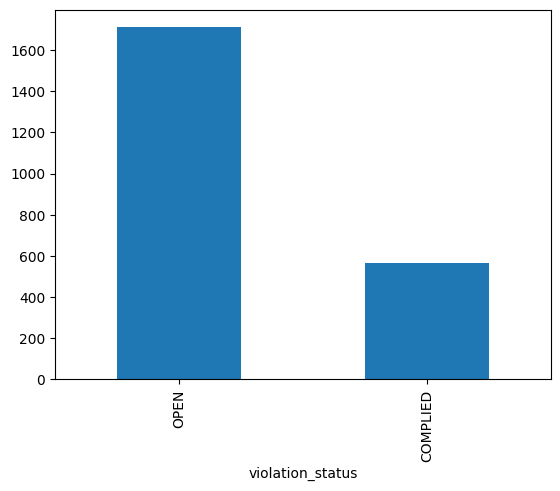

In [70]:
graph_no_heat['violation_status'].value_counts().plot(kind = 'bar')

### Join

In [71]:
#looking for other potential heat violations
build.head()

id violation_last_modified_date violation_date violation_code  \
126   7152814      2024-04-22T11:24:24.000     2024-04-22       CN132016   
773   7148900      2024-04-15T09:05:32.000     2024-04-15       CN132016   
1521  7146237      2024-04-08T13:05:35.000     2024-04-08       CN132016   
1525  7145591      2024-04-08T14:44:35.000     2024-04-08       CN132016   
1836  7144175      2024-04-04T13:01:43.000     2024-04-04       CN132016   

     violation_status violation_status_date violation_description  \
126              OPEN                   NaN  HEAT UNIT ADEQUATELY   
773              OPEN                   NaN  HEAT UNIT ADEQUATELY   
1521             OPEN                   NaN  HEAT UNIT ADEQUATELY   
1525             OPEN                   NaN  HEAT UNIT ADEQUATELY   
1836             OPEN                   NaN  HEAT UNIT ADEQUATELY   

                                     violation_location  \
126   INTERIOR:001 :ENTIRE SINGLE FAMILY HOME AND BA...   
773                                      INTERIOR:002 :   
1521                                OTHER   :    :OTHER   
1525                                     INTERIOR:002 :   
1836                                OTHER   :    :OTHER   

                           violation_inspector_comments  \
126   2316 W / ALL ROOMS - 57F AT 11:10AM, BASEMENT ...   
773   1263 S CENTRAL PARK APT 2 / ALL ROOMS 72F DEGR...   
1521  CB132016 - 2ND FLOOR BEDROOMS TEMP WAS 66F AT ...   
1525  2207 S / APT.2 / ALL ROOMS - 64F DEGREES; AT (...   
1836  UNIT 104 / ROOM TEMPERATURES : BEDROOM AT FRON...   

                                    violation_ordinance  ... street_type  \
126   Heat dwelling unit adequately from September 1...  ...          ST   
773   Heat dwelling unit adequately from September 1...  ...         AVE   
1521  Heat dwelling unit adequately from September 1...  ...        BLVD   
1525  Heat dwelling unit adequately from September 1...  ...         AVE   
1836  Heat dwelling unit adequately from September 1...  ...         AVE   

      property_group ssa   latitude  longitude  \
126           255742 NaN  41.871463 -87.684518   
773            15707 NaN  41.864450 -87.715218   
1521          397833 NaN  41.770705 -87.658975   
1525           26373 NaN  41.851364 -87.718497   
1836           19107 NaN  41.790078 -87.590369   

                                             location month  year  \
126    \n,  \n(41.87146304476723, -87.68451837447857)     4  2024   
773   \n,  \n(41.864450173563014, -87.71521848941047)     4  2024   
1521   \n,  \n(41.77070465111202, -87.65897462365271)     4  2024   
1525   \n,  \n(41.85136381385009, -87.71849743242603)     4  2024   
1836   \n,  \n(41.79007818420464, -87.59036862158871)     4  2024   

             is_heat month_year  
126   heat_violation     4-2024  
773   heat_violation     4-2024  
1521  heat_violation     4-2024  
1525  heat_violation     4-2024  
1836  heat_violation     4-2024  

[5 rows x 30 columns]

In [72]:
#looking at first dataframe for the join to make sure it matches up
graph_no_heat.head()

id violation_last_modified_date violation_date violation_code  \
126   7152814      2024-04-22T11:24:24.000     2024-04-22       CN132016   
773   7148900      2024-04-15T09:05:32.000     2024-04-15       CN132016   
1521  7146237      2024-04-08T13:05:35.000     2024-04-08       CN132016   
1525  7145591      2024-04-08T14:44:35.000     2024-04-08       CN132016   
1836  7144175      2024-04-04T13:01:43.000     2024-04-04       CN132016   

     violation_status violation_status_date violation_description  \
126              OPEN                   NaN  HEAT UNIT ADEQUATELY   
773              OPEN                   NaN  HEAT UNIT ADEQUATELY   
1521             OPEN                   NaN  HEAT UNIT ADEQUATELY   
1525             OPEN                   NaN  HEAT UNIT ADEQUATELY   
1836             OPEN                   NaN  HEAT UNIT ADEQUATELY   

                                     violation_location  \
126   INTERIOR:001 :ENTIRE SINGLE FAMILY HOME AND BA...   
773                                      INTERIOR:002 :   
1521                                OTHER   :    :OTHER   
1525                                     INTERIOR:002 :   
1836                                OTHER   :    :OTHER   

                           violation_inspector_comments  \
126   2316 W / ALL ROOMS - 57F AT 11:10AM, BASEMENT ...   
773   1263 S CENTRAL PARK APT 2 / ALL ROOMS 72F DEGR...   
1521  CB132016 - 2ND FLOOR BEDROOMS TEMP WAS 66F AT ...   
1525  2207 S / APT.2 / ALL ROOMS - 64F DEGREES; AT (...   
1836  UNIT 104 / ROOM TEMPERATURES : BEDROOM AT FRON...   

                                    violation_ordinance  ... property_group  \
126   Heat dwelling unit adequately from September 1...  ...         255742   
773   Heat dwelling unit adequately from September 1...  ...          15707   
1521  Heat dwelling unit adequately from September 1...  ...         397833   
1525  Heat dwelling unit adequately from September 1...  ...          26373   
1836  Heat dwelling unit adequately from September 1...  ...          19107   

      ssa   latitude  longitude  \
126   NaN  41.871463 -87.684518   
773   NaN  41.864450 -87.715218   
1521  NaN  41.770705 -87.658975   
1525  NaN  41.851364 -87.718497   
1836  NaN  41.790078 -87.590369   

                                             location month  year  \
126    \n,  \n(41.87146304476723, -87.68451837447857)     4  2024   
773   \n,  \n(41.864450173563014, -87.71521848941047)     4  2024   
1521   \n,  \n(41.77070465111202, -87.65897462365271)     4  2024   
1525   \n,  \n(41.85136381385009, -87.71849743242603)     4  2024   
1836   \n,  \n(41.79007818420464, -87.59036862158871)     4  2024   

             is_heat month_year heat_violation_counts  
126   heat_violation     4-2024                     1  
773   heat_violation     4-2024                     1  
1521  heat_violation     4-2024                     1  
1525  heat_violation     4-2024                     1  
1836  heat_violation     4-2024                     1  

[5 rows x 31 columns]

In [73]:
#creating a new data frame to select another violation code that may contribute to lack of heat
graph_heat_extra = build[build['violation_code'] == 'CN104015']

In [74]:
#checking the new data frame
graph_heat_extra.head()

Empty DataFrame
Columns: [id, violation_last_modified_date, violation_date, violation_code, violation_status, violation_status_date, violation_description, violation_location, violation_inspector_comments, violation_ordinance, inspector_id, inspection_number, inspection_status, inspection_waived, inspection_category, department_bureau, address, street_number, street_direction, street_name, street_type, property_group, ssa, latitude, longitude, location, month, year, is_heat, month_year]
Index: []

[0 rows x 30 columns]

In [75]:
#combining the new violation code with the original heat violation code through a join to see them all together
left_join = pd.merge(graph_no_heat, graph_heat_extra, how = 'left', on = 'id')

In [ ]:
#checking the join to make sure it came out as desired
left_join.head()

Making an extra graph for fun!

In [95]:
#sorting the violations by month
heat_violations_by_month = graph_no_heat.groupby(['month'])['heat_violation_counts'].count().reset_index().groupby(['month'])['heat_violation_counts'].sum()

In [96]:
#printing the violations by month
print(heat_violations_by_month)

month
1     682
2     417
3     152
4      76
5      34
6       1
7       1
8       1
9      12
10    228
11    351
12    320
Name: heat_violation_counts, dtype: int64


In [97]:
#exporting the violations by month for a datawrapper graph
heat_violations_by_month.to_csv('heat_violations_by_month')